In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import numpy as np
from sklearn.utils import shuffle

In [4]:
data = pd.read_csv('energy.csv')
l = []
for i in range(0,len(data)):
    if data['W'].values[i] == '\\N' or data['VAR'].values[i] == '\\N':
        l.append(i)
print(l)
data = data.drop(l)
data.head()

[102920, 192914, 331538, 345698, 434944]


,timestamp,W,VAR
0,1369353600,0,6.00003E-18
1,1369353601,0,6.00003E-18
2,1369353602,0,6.00003E-18
3,1369353603,0,6.00003E-18
4,1369353604,0,6.00003E-18


In [5]:
print(len(data))

499994


In [6]:
stdW = np.std(data['W'].values.astype(float))
mW = np.mean(data['W'].values.astype(float))
W,VAR = [],[]
for i in data['W'].values.astype(float):
    W.append((i-mW)/stdW)
stdVAR = np.std(data['VAR'].values.astype(float))
mVAR = np.mean(data['VAR'].values.astype(float))
for i in data['VAR'].values.astype(float):
    VAR.append((i-mVAR)/stdVAR)
X = []
for i in range(len(data)):
    X.append([W[i], VAR[i]])


In [7]:
time = data['timestamp'].values.astype(int)

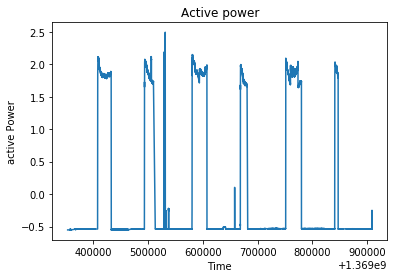

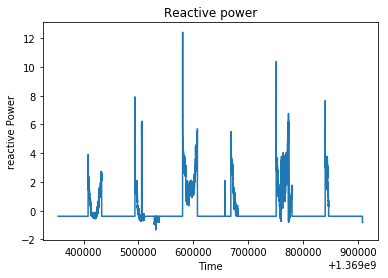

In [8]:
plt.plot(time,W)
plt.xlabel('Time')
plt.ylabel('active Power')
plt.title('Active power')
plt.show()
plt.plot(time,VAR)
plt.xlabel('Time')
plt.ylabel('reactive Power')
plt.title('Reactive power')
plt.show()

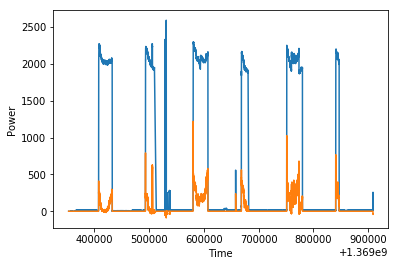

In [9]:
plt.plot(time,data['W'].values.astype(float))
plt.plot(time,data['VAR'].values.astype(float))
plt.xlabel('Time')
plt.ylabel('Power')
plt.show()

In [10]:
W = data['W'].values.astype(float)
VAR = data['VAR'].values.astype(float)
events = []
WC = [W[0]]
VARC = [VAR[0]]
for i in range(1,len(data)):
    if abs(WC[-1] - W[i]) < 20:
        WC.append(W[i])
        VARC.append(W[i])
    else:
        events.append([np.mean(WC),np.mean(VARC)])
        VARC = [VAR[i]]
        WC = [W[i]]

In [11]:
events

[[9.823766305572349, 9.823766305572349],
 [52.0522995, 108.330150605],
 [633.82299805, 260.32400513],
 [507.38598633, 186.8500061],
 [421.1776799665142, 419.68483433314276],
 [973.02099609, 691.134002685],
 [1592.1600342, 281.75601196],
 [1699.3900146, 263.89401245],
 [1769.8399658, 247.94799805],
 [1839.75, 1043.81500244],
 [1934.3433431, 1366.6186828466664],
 [1890.625, 1065.313003515],
 [1851.7573323533331, 1744.7744649193332],
 [1867.3671526142857, 1636.4134412357141],
 [1896.2800293, 244.11999512],
 [1933.2299805, 1091.702491775],
 [1958.7600097833335, 1674.4988454283332],
 [1985.9299926499998, 1550.7942542874998],
 [2014.8866577166664, 1866.3787358616667],
 [2041.1379882733336, 1921.0778544060004],
 [2072.39802247, 1980.159124002],
 [2099.836316560526, 2050.4092346992097],
 [2208.275013910557, 2207.578829497086],
 [2119.331322013716, 2116.929079923386],
 [2097.75200194, 1964.1128483988],
 [2063.1093426762736, 2062.586527154512],
 [2017.7674192829916, 2013.6312252648606],
 [2043.2

In [12]:
distances = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    distances.append(km.inertia_)
    print("k = {} centroids are = {}".format(k,km.cluster_centers_))

k = 2 centroids are = [[ 1.85693055  1.34111705]
 [-0.5348459  -0.38627775]]
k = 3 centroids are = [[-0.53418163 -0.38367813]
 [ 1.92626543  2.58357635]
 [ 1.80894376  0.17058749]]
k = 4 centroids are = [[-0.53485521 -0.38628381]
 [ 1.85475834  1.51826992]
 [ 1.79546344 -0.16160133]
 [ 1.95531466  3.38257064]]
k = 5 centroids are = [[-0.53485504 -0.3862777 ]
 [ 1.93550881  2.85382629]
 [ 1.79455378 -0.19802947]
 [ 1.84873004  1.38576125]
 [ 1.97911692  4.43310335]]
k = 6 centroids are = [[ 1.79170848 -0.30369226]
 [-0.53485265 -0.38627432]
 [ 1.94287714  2.99047804]
 [ 1.82346447  0.76267682]
 [ 1.98489534  4.60961039]
 [ 1.86112264  1.66802064]]
k = 7 centroids are = [[-0.53485521 -0.38628381]
 [ 1.96071822  3.59911618]
 [ 1.8199456   0.71444926]
 [ 1.79155586 -0.31027964]
 [ 1.85835302  1.59011878]
 [ 2.01736255  5.15317022]
 [ 1.92531806  2.68366705]]
k = 8 centroids are = [[-0.53549891 -0.38853063]
 [ 1.92561887  2.68501904]
 [ 1.79154411 -0.31201417]
 [ 1.89414233  1.58929757]
 [ 

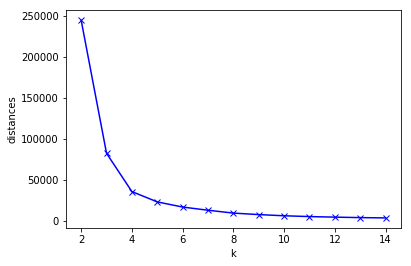

In [13]:
plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('distances')
plt.show()

In [14]:
for i in range(2,15):
    print("{} => {}".format(i,distances[i-2]))

2 => 244389.38298540318
3 => 82344.38075353898
4 => 35748.582361303415
5 => 23176.822130921035
6 => 16903.643196418132
7 => 13018.288063263786
8 => 9553.292866720636
9 => 7708.763755496318
10 => 6291.862645644447
11 => 5296.239275068991
12 => 4626.660282537247
13 => 4049.6849673614192
14 => 3671.0993249202293


NameError: name 'date' is not defined